In [45]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import tkinter as tk
from tkinter import scrolledtext, messagebox, ttk
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xVEXx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xVEXx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xVEXx\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:

# Define preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(words)

In [47]:
# Define function to get the most frequent terms in a cluster
def get_top_terms_per_cluster(X, clusters, vectorizer, top_n=10):
    terms = vectorizer.get_feature_names_out()
    df = pd.DataFrame(X.toarray()).groupby(clusters).mean()
    top_terms = {}
    for i, row in df.iterrows():
        top_terms[i] = [terms[idx] for idx in row.nlargest(top_n).index]
    return top_terms

In [48]:
# Define function to assign cluster names based on top terms
def assign_cluster_names(top_terms):
    economic_keywords = {
        'economy', 'finance', 'tax', 'market', 'debt', 'profit', 'inflation', 'investment', 'growth','stock', 'trade', 'cost', 'price', 'fund', 'income', 'revenue', 'expenditure', 'budget', 'fiscal','monetary', 'interest', 'credit', 'banking', 'insurance', 'currency', 'exchange', 'dividend', 'bond', 'equity', 'capital', 'asset', 'liability', 'mortgage', 'real estate', 'GDP', 'unemployment'
    }
    entertainment_keywords = {
        'movie', 'film', 'music', 'festival', 'star', 'concert', 'award', 'book', 'celebrity', 'album', 'show', 'performance', 'actor', 'theater', 'drama', 'comedy', 'series', 'television', 'episode', 'director', 'producer', 'script', 'screenplay', 'cinema', 'musician', 'band', 'song', 'lyrics', 'genre', 'entertainment', 'art', 'dance', 'exhibit', 'gallery', 'museum', 'painting', 'sculpture', 'fans'
    }
    politics_keywords = {
        'government', 'election', 'policy', 'minister', 'parliament', 'vote', 'party', 'law', 'campaign', 'political', 'debate', 'conflict', 'congress', 'president', 'bill', 'governor', 'legislation', 'nato', 'democracy', 'republic', 'candidate', 'lawmaker', 'executive', 'judiciary', 'constitution', 'referendum', 'prime', 'coalition', 'cabinet', 'diplomacy', 'ambassador', 'treaty', 'foreign', 'domestic', 'security', 'military', 'defense', 'war', 'peace', 'international', 'policy', 'rights'
    }
    
    cluster_names = {}
    for cluster, terms in top_terms.items():
        economic_score = len(economic_keywords.intersection(terms))
        entertainment_score = len(entertainment_keywords.intersection(terms))
        politics_score = len(politics_keywords.intersection(terms))
        
        if economic_score >= entertainment_score and economic_score >= politics_score:
            cluster_names[cluster] = "economics"
        elif entertainment_score >= economic_score and entertainment_score >= politics_score:
            cluster_names[cluster] = "entertainment"
        else:
            cluster_names[cluster] = "politics"
    
    return cluster_names

In [59]:
# Define function to cluster documents
def cluster_documents(documents, max_clusters=3):
    processed_docs = [preprocess_text(doc) for doc in documents]
    vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
    X = vectorizer.fit_transform(processed_docs)
    
    # Dimensionality reduction
    pca = PCA(n_components=0.95)  # Keep 95% of variance
    X_reduced = pca.fit_transform(X.toarray())
    
    n_clusters = min(len(documents), max_clusters)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++', max_iter=500)
    kmeans.fit(X_reduced)
    
    clusters = kmeans.labels_
    
    top_terms = get_top_terms_per_cluster(X, clusters, vectorizer)
    cluster_names = assign_cluster_names(top_terms)
    
    # Remap clusters to the desired order: 0 - Economics, 1 - Entertainment, 2 - Politics
    remapped_clusters = []
    for cluster in clusters:
        cluster_name = cluster_names.get(cluster, "Default")
        if cluster_name == "economics":
            remapped_clusters.append(0)
        elif cluster_name == "entertainment":
            remapped_clusters.append(1)
        elif cluster_name == "politics":
            remapped_clusters.append(2)
        else:
            remapped_clusters.append(cluster)
    
    # Create a consistent mapping from cluster number to name
    cluster_number_to_name = {0: "economics", 1: "entertainment", 2: "politics"}
    
    return remapped_clusters, cluster_number_to_name

In [61]:
# Define function to save results to CSV
def save_to_csv(documents, clusters, cluster_names, filename='clustered_documents.csv'):
    data = {
        'Cluster Name': [cluster_names.get(cluster, "Default") for cluster in clusters],
        'Cluster Number': clusters,
        'Content': documents
    }
    
    df = pd.DataFrame(data)
    if os.path.exists(filename):
        df.to_csv(filename, mode='a', header=False, index=False)
    else:
        df.to_csv(filename, mode='w', header=True, index=False)

In [63]:
# Define dark mode colors
dark_mode = {
    "background_color": "#1e1e1e",
    "foreground_color": "#e8e8e8",
    "button_color": "#3c6e71",
    "button_hover_color": "#284b63",
    "entry_background_color": "#2d2d2d",
    "entry_foreground_color": "#ffffff",
    "treeview_background_color": "#2d2d2d",
    "treeview_foreground_color": "#e8e8e8",
    "treeview_heading_background": "#3c6e71",
    "treeview_heading_foreground": "#000000"
}

# Define light mode colors
light_mode = {
    "background_color": "#ffffff",
    "foreground_color": "#000000",
    "button_color": "#dcdcdc",
    "button_hover_color": "#b0b0b0",
    "entry_background_color": "#f0f0f0",
    "entry_foreground_color": "#000000",
    "treeview_background_color": "#ffffff",
    "treeview_foreground_color": "#000000",
    "treeview_heading_background": "#dcdcdc",
    "treeview_heading_foreground": "#000000"
}


# Define GUI application
class DocumentClusteringApp:
    def __init__(self, root):
        self.root = root
        self.current_mode = dark_mode
        self.root.title("Document Clustering")
        self.root.configure(bg=self.current_mode["background_color"])

        self.style = ttk.Style()
        self.style.theme_use("clam")

        self.label = ttk.Label(root, text="Enter news articles (separate articles with double newlines):")
        self.label.grid(row=0, column=0, columnspan=3, padx=10, pady=10, sticky="w")

        self.text_area = scrolledtext.ScrolledText(root, wrap=tk.WORD, width=50, height=20)
        self.text_area.grid(row=1, column=0, columnspan=3, padx=10, pady=10, sticky="nsew")

        self.cluster_button = ttk.Button(root, text="Cluster Documents", command=self.cluster_documents)
        self.cluster_button.grid(row=2, column=0, padx=5, pady=10, sticky="ew")

        self.clear_button = ttk.Button(root, text="Clear", command=self.clear_text)
        self.clear_button.grid(row=2, column=1, padx=5, pady=10, sticky="ew")

        self.toggle_button = ttk.Button(root, text="Light Mode", command=self.toggle_mode)
        self.toggle_button.grid(row=2, column=2, padx=5, pady=10, sticky="ew")

        self.result_label = ttk.Label(root, text="")
        self.result_label.grid(row=3, column=0, columnspan=3, padx=10, pady=10, sticky="w")

        self.root.columnconfigure(0, weight=1)
        self.root.columnconfigure(1, weight=1)
        self.root.columnconfigure(2, weight=1)
        self.root.rowconfigure(1, weight=1)

        self.apply_styles(self.current_mode)

    def apply_styles(self, mode):
        self.root.configure(bg=mode["background_color"])
        self.style.configure("TFrame", background=mode["background_color"])
        self.style.configure("TLabel", background=mode["background_color"], foreground=mode["foreground_color"], font=("Arial", 12))
        self.style.configure("TEntry", background=mode["entry_background_color"], foreground=mode["entry_foreground_color"], font=("Arial", 12))
        self.style.configure("TButton", background=mode["button_color"], foreground=mode["foreground_color"], font=("Arial", 12, "bold"))
        self.style.map("TButton", background=[('active', mode["button_hover_color"])], foreground=[('active', mode["foreground_color"])])
        self.text_area.configure(bg=mode["entry_background_color"], fg=mode["entry_foreground_color"], insertbackground=mode["foreground_color"])
        self.result_label.configure(background=mode["background_color"], foreground=mode["foreground_color"])

    def toggle_mode(self):
        if self.current_mode == dark_mode:
            self.current_mode = light_mode
            self.toggle_button.config(text="Dark Mode")
        else:
            self.current_mode = dark_mode
            self.toggle_button.config(text="Light Mode")
        self.apply_styles(self.current_mode)

    def clear_text(self):
        self.text_area.delete("1.0", tk.END)

    def cluster_documents(self):
        content = self.text_area.get("1.0", tk.END).strip()
        documents = [doc.strip() for doc in content.split('\n\n') if doc.strip()]
        if not documents:
            messagebox.showwarning("Input Error", "Please enter at least one news article to cluster.")
            return

        try:
            clusters, cluster_names = cluster_documents(documents)
            save_to_csv(documents, clusters, cluster_names)
            
            # Create a mapping from cluster number to name for display purposes
            cluster_mapping = {0: "Economics", 1: "Entertainment", 2: "Politics"}
            
            result_text = ""
            for doc, cluster in zip(documents, clusters):
                cluster_name = cluster_mapping.get(cluster, "Default")  # Map the cluster number to name
                result_text += f"Cluster {cluster} ({cluster_name}):\n{doc}\n\n"
            self.result_label.config(text=result_text)
        except ValueError as e:
            messagebox.showerror("Clustering Error", str(e))

if __name__ == "__main__":
    root = tk.Tk()
    app = DocumentClusteringApp(root)
    root.mainloop()


C:\Users\xVEXx\anaconda3\Lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
C:\Users\xVEXx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\xVEXx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\xVEXx\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\xVEXx\AppData\Local\Temp\ipykernel_12696\2666898250.py", line 97, in cluster_

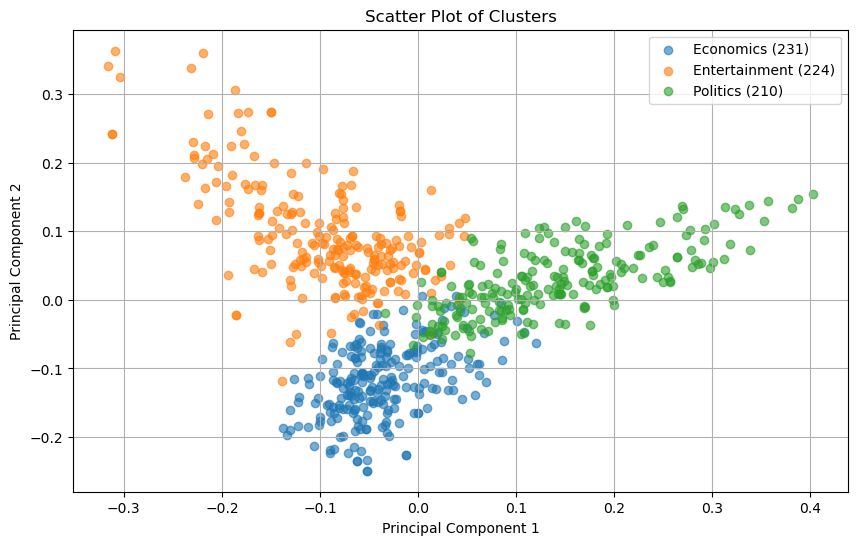

In [64]:
# Load the dataset
file_path = 'clustered_documents.csv'
df = pd.read_csv(file_path)

# Extract documents and clusters
documents = df['content'].tolist()  
clusters = df['Cluster'].tolist()  

# Perform vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
X = vectorizer.fit_transform(documents)

# Dimensionality reduction to 2 components for scatter plot
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Define the cluster name mapping
cluster_name_mapping = {0: "Economics", 1: "Entertainment", 2: "Politics"}

# Count the occurrences of each cluster
cluster_counts = {cluster_name_mapping.get(cluster, f'Cluster {cluster}'): clusters.count(cluster) for cluster in np.unique(clusters)}

# Scatter plot of the clusters with names and counts
def plot_clusters_with_names(X_reduced, clusters, cluster_name_mapping, cluster_counts):
    plt.figure(figsize=(10, 6))
    unique_clusters = np.unique(clusters)
    for cluster in unique_clusters:
        cluster_name = cluster_name_mapping.get(cluster, f'Cluster {cluster}')
        plt.scatter(X_reduced[np.array(clusters) == cluster, 0], X_reduced[np.array(clusters) == cluster, 1], label=f'{cluster_name} ({cluster_counts[cluster_name]})', alpha=0.6)
    plt.title('Scatter Plot of Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the clusters with names and counts
plot_clusters_with_names(X_reduced, clusters, cluster_name_mapping, cluster_counts)